In [1]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
import torch
from torch.autograd import Variable

## import self-written packages 
from util import *
from prim_fdr import *
from data_loader import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

## bh testing summary ##
# n_rej = 8368
# t_rej = 0.008368


FDP: 0.0815009560229 

## sbh summary ##
# n_rej = 9484
# t_rej = 0.011713
# pi_0 estimate = 0.810


FDP: 0.100063264445



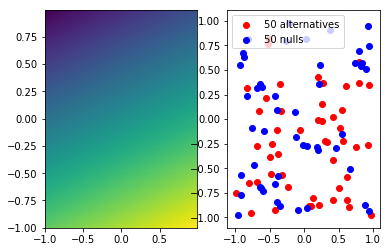

In [2]:
## generating a 1d toy data 
# p,x,h=toy_data_1d(n_sample=100000,vis=1)
# p,h,x=neuralfdr_generate_data_2D(job=0,data_vis=1) ## gaussian mixture
p,h,x=neuralfdr_generate_data_2D(job=1,data_vis=1) ## linear trend 
# p,h,x=neuralfdr_generate_data_2D(job=2,data_vis=1) ## gaussian mixture + linear trend

## testing the BH method
n_rej,t_rej=bh(p,alpha=0.1,verbose=True)
print('FDP: %s \n'%str( np.sum((h==0)*(p<t_rej)/np.sum(p<t_rej))))

## testing the Storey BH method
n_rej,t_rej,pi0_hat=storey_bh(p,alpha=0.1,verbose=True)
print('FDP: %s\n'%str( np.sum((h==0)*(p<t_rej)/np.sum(p<t_rej))))

## PrimFDR_init starts
# Learning null distribution
# Learning alternative distribution
# Test result with PrimFDR_init
# Num of discovery: 10249




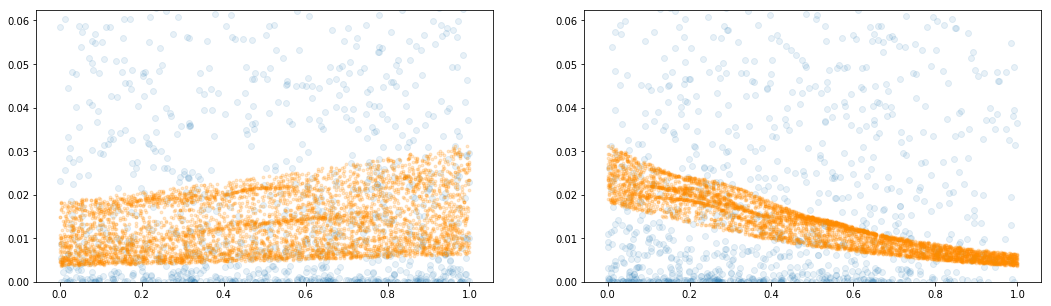

## PrimFDR_init finishes

## optimization paramter:
# n_itr=20000, n_samp=100000, lambda0=418, lambda1=100

## optimization initialization:
# Slope: a=[ 0.54705566 -1.60148931], b=[-3.99538803]
# Bump 0: w=-5.61824, mu=[ 0.220057    0.22505166], sigma=[ 0.01656658  0.01786331]
# Bump 1: w=-5.5487, mu=[ 0.84211946  0.29250473], sigma=[ 0.0087188   0.02290333]
# Bump 2: w=-6.13218, mu=[ 0.70112711  0.53462505], sigma=[ 0.02661905  0.02774622]
# Bump 3: w=-5.37191, mu=[ 0.48329774  0.24305312], sigma=[ 0.01534715  0.01485631]
# Bump 4: w=-6.052, mu=[ 0.46139941  0.53020936], sigma=[ 0.03687372  0.01164122]


## iteration 0
n_rej:  10247
n_rej sig:  10073.7
FD esti mirror: 1024
FD esti mirror sig: 1026.79
loss1:  [-0.10073686]
loss2:  [ 0.01942534]
Estimated FDP: [ 0.10192833]
FDP: 0.0
Slope: a=[ 0.54205567 -1.6064893 ], b=[-4.00038815]
Bump 0: w=-5.62324, mu=[ 0.22505689  0.23005128], sigma=[ 0.01656658  0.01786331]
Bump 1: w=-5.55369, mu=[ 0.83712006  0.28750598], sigma=[ 0.0087188   0.0

/home/martin/NeuralFDR2/util.py:164: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


## iteration 4000
n_rej:  10277
n_rej sig:  10071.0
FD esti mirror: 1001
FD esti mirror sig: 1005.65
loss1:  [-0.10071006]
loss2:  [ 0.]
Estimated FDP: [ 0.09985621]
FDP: 0.0
Slope: a=[ 0.66451091 -1.98741508], b=[-3.96616936]
Bump 0: w=-5.11471, mu=[ 0.2693775   0.35451022], sigma=[ 0.01656658  0.01786331]
Bump 1: w=-4.77959, mu=[ 0.73480898  0.19768801], sigma=[ 0.0087188   0.02290333]
Bump 2: w=-5.48038, mu=[ 0.51942718  0.01394186], sigma=[ 0.02661905  0.02774622]
Bump 3: w=-4.71567, mu=[ 0.41619739  0.25869852], sigma=[ 0.01534715  0.01485631]
Bump 4: w=-5.57116, mu=[ 0.79072171  0.4476817 ], sigma=[ 0.03687372  0.01164122]


## iteration 8000
n_rej:  10264
n_rej sig:  10063.2
FD esti mirror: 989
FD esti mirror sig: 1002.25
loss1:  [-0.10063173]
loss2:  [ 0.]
Estimated FDP: [ 0.09959614]
FDP: 0.0
Slope: a=[ 0.67327636 -2.07860804], b=[-3.96783829]
Bump 0: w=-5.11691, mu=[ 0.25201154  0.38848305], sigma=[ 0.01656658  0.01786331]
Bump 1: w=-4.75097, mu=[ 0.73394406  0.19578466], sig

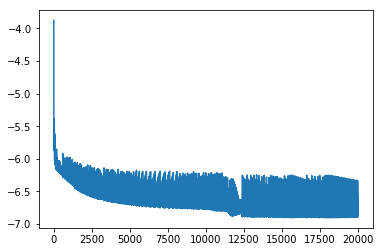

# Num of discovery: 10545




In [3]:
n_rej,t=PrimFDR(p,x,5,alpha=0.1,h=None,n_itr=20000,verbose=True)

### Testing ###

In [10]:
## testing the initialization 
w,a,mu,sigma = ML_init(p,x,3,alpha=0.1,n_itr=100,h=h,verbose=True)

# plt.figure()
# temp=np.linspace(0,1,101)
# plt.hist(x[h==1],bins=50,weights=1/np.sum(h==1)*50*np.ones([np.sum(h==1)]))
# temp = np.linspace(0,1,101)
# plt.plot(temp,f_all(temp,a,mu,sigma,w))
# plt.show()

### ML initialization starts ###

## Learned parameters: ##
Slope: w=0.923250862995, a=[ 0.44940918 -1.30849121]
Bump 0: w=0.0248348951079, mu=[ 0.58803818  0.57442758], sigma=[ 0.15747715  0.08183423]
Bump 1: w=0.0305436927468, mu=[ 0.32894391  0.26822023], sigma=[ 0.1286829   0.10621428]
Bump 2: w=0.0213705491505, mu=[ 0.69782     0.32363947], sigma=[ 0.12019481  0.1010864 ]


## Testing Summary ##
Num of alternatives: 19896.0
Num of discovery: 10112
Num of true discovery: 9118.0
Actual FDP: 0.0982990506329




### Parameters
n_itr=1000, n_samp=100000, lambda0=119.507184867, lambda1=100.0
### ML initialization starts ###

## Learned parameters: ##
Slope: w=0.923250862995, a=[ 0.44940918 -1.30849121]
Bump 0: w=0.0248348951079, mu=[ 0.58803818  0.57442758], sigma=[ 0.15747715  0.08183423]
Bump 1: w=0.0305436927468, mu=[ 0.32894391  0.26822023], sigma=[ 0.1286829   0.10621428]
Bump 2: w=0.0213705491505, mu=[ 0.69782     0.32363947], sigma=[ 0.12019481  0.1010864 ]


## Summary before optimization ##
## Testing Summary ##
Num of alternatives: 19896.0
Num of discovery: 10109
Num of true discovery: 9115.0
Actual FDP: 0.0983282223761


### initialization value
Slope: a=[ 0.44940919 -1.30849123], b=[-4.63120937]
Bump 0: w=-6.08399, mu=[ 0.58803821  0.5744276 ], sigma=[ 0.04959811  0.01339368]
Bump 1: w=-5.93592, mu=[ 0.32894391  0.26822025], sigma=[ 0.03311858  0.02256295]
Bump 2: w=-6.17534, mu=[ 0.69782001  0.32363948], sigma=[ 0.02889358  0.02043692]


### iteration 0 ###
mean t:  0.00741577
mean 

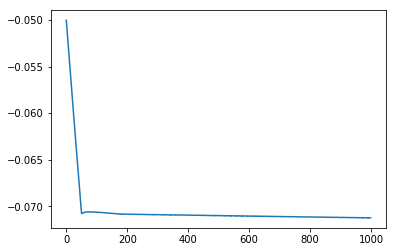

### Summary ###
method: perim_test_1d
# rejections: 10226
FDP: 0.0994523762957
### End Summary ###


In [28]:
## test prim_fdr
n_rej,t=PrimFDR(p,x,3,alpha=0.1,h=h,n_itr=1000,verbose=True)

print("### Summary ###")
print("method: perim_test_1d")
print("# rejections: %s"%str(n_rej))
print("FDP: %s"%str( np.sum((h==0)*(p<t))/np.sum(p<t)))
print("### End Summary ###")